In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce

In [2]:
data = pd.read_excel(r'Data_Train.xlsx')
test = pd.read_excel(r'Data_Test.xlsx')

In [3]:
ce.TargetEncoder(cols=[])

TargetEncoder(cols=[], drop_invariant=False, handle_missing='value',
       handle_unknown='value', min_samples_leaf=1, return_df=True,
       smoothing=1.0, verbose=0)

In [3]:
data.shape, test.shape

((6019, 13), (1234, 12))

In [4]:
data.columns, test.columns

(Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
        'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
        'New_Price', 'Price'],
       dtype='object'),
 Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
        'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
        'New_Price'],
       dtype='object'))

In [5]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
def company(item):
    """Function to extract the first word from the given text description"""
    return item.split()[0]

data['Company']=data['Name'].apply(company)   # The first word of the string "name" represents the "company"
test['Company']=test['Name'].apply(company)   # The first word of the string "name" represents the "company"

In [8]:
def car(item):
    l = item.split()
    #print(l)
    if len(l)>2:
        return l[1]+str(' ')+l[2]
    else:
        return l[1]

data['Car']=data['Name'].apply(car)
test['Car']=test['Name'].apply(car)

In [9]:
data['Log_Price']=np.log(data['Price'])

In [10]:
rare = data.Company.value_counts()[data.Company.value_counts(normalize=True).cumsum()>0.95].index

In [11]:
def p(item):
    if item in rare:
        return 'Others'
    else:
        return item
data['P_Company']=data['Company'].apply(p)
test['P_Company']=test['Company'].apply(p)

In [12]:
rare2 = data.Car.value_counts()[data.Car.value_counts(normalize=True).cumsum()>0.95].index

In [13]:
def p(item):
    if item in rare2:
        return 'Others'
    else:
        return item
data['P_Car']=data['Car'].apply(p)
test['P_Car']=test['Car'].apply(p)

In [14]:
data['Engine'].fillna(0, inplace=True)
test['Engine'].fillna(0, inplace=True)

In [15]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Company', 'Car', 'Log_Price', 'P_Company',
       'P_Car'],
      dtype='object')

In [16]:
def p3(item):
    if(item):
        num = str(item).split()[0]
        return int(num)
    else:
        return item

data['Engine']=data['Engine'].apply(p3)
test['Engine']=test['Engine'].apply(p3)

In [17]:
c=[]
for index, row in data.iterrows():
    if row['Engine']==0:
        c.append(data[data['Car']==row['Car']]['Engine'].mean())
    else:
        c.append(row['Engine'])
        
data['P_Engine']=c

c=[]
for index, row in test.iterrows():
    if row['Engine']==0:
        c.append(data[data['Car']==row['Car']]['Engine'].mean())
    else:
        c.append(row['Engine'])
        
test['P_Engine']=c

In [18]:
data[data['P_Engine']==0].shape, test[test['P_Engine']==0].shape

((14, 19), (3, 17))

In [19]:
c=[]
for index, row in data.iterrows():
    if row['Engine']==0:
        c.append(data[data['Company']==row['Company']]['Engine'].mean())
    else:
        c.append(row['Engine'])
        
data['P_Engine']=c

c=[]
for index, row in test.iterrows():
    if row['Engine']==0:
        c.append(data[data['Company']==row['Company']]['Engine'].mean())
    else:
        c.append(row['Engine'])
        
test['P_Engine']=c

In [20]:
data[data['P_Engine']==0].shape, test[test['P_Engine']==0].shape

((0, 19), (0, 17))

In [21]:
data[data.Power.isnull()].shape

(36, 19)

In [22]:
data.Power.fillna('null bhp', inplace =True)

In [23]:
data.Power = np.where(data.Power=='null bhp', 0, data.Power)
test.Power = np.where(test.Power=='null bhp', 0, test.Power)

In [24]:
def p4(item):
    num = str(item).split()[0]
    #print(num)
    return float(num)

data['P_Power']=data['Power'].apply(p4)
test['P_Power']=test['Power'].apply(p4)

In [25]:
data[data['P_Power']==0].shape

(143, 20)

In [26]:
c=[]
for index, row in data.iterrows():
    if row['P_Power']==0:
        c.append(data[data['Car']==row['Car']]['P_Power'].mean())
    else:
        c.append(row['P_Power'])
        
data['P_Power']=c

c=[]
for index, row in test.iterrows():
    if row['P_Power']==0:
        c.append(data[data['Car']==row['Car']]['P_Power'].mean())
    else:
        c.append(row['P_Power'])
        
test['P_Power']=c

In [27]:
data[data['P_Power']==0].shape, test[test['P_Power']==0].shape

((52, 20), (6, 18))

In [28]:
c=[]
for index, row in data.iterrows():
    if row['P_Power']==0:
        c.append(data[data['Company']==row['Company']]['P_Power'].mean())
    else:
        c.append(row['P_Power'])
        
data['P_Power']=c

c=[]
for index, row in test.iterrows():
    if row['P_Power']==0:
        c.append(data[data['Company']==row['Company']]['P_Power'].mean())
    else:
        c.append(row['P_Power'])
        
test['P_Power']=c

In [29]:
data[data['P_Power']==0].shape, test[test['P_Power']==0].shape

((1, 20), (0, 18))

In [30]:
c=[]
for index, row in data.iterrows():
    if row['P_Power']==0:
        c.append(data['P_Power'].mean())
    else:
        c.append(row['P_Power'])
        
data['P_Power']=c

In [31]:
data[data['P_Power']==0].shape, test[test['P_Power']==0].shape

((0, 20), (0, 18))

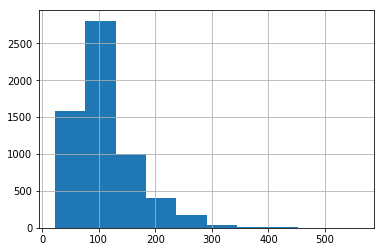

In [34]:
data.P_Power.hist()

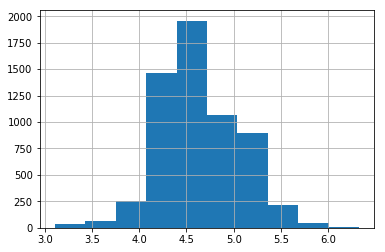

In [33]:
np.log(data.P_Power).hist()

In [35]:
data['P_Power']=np.log(data['P_Power'])
test['P_Power']=np.log(test['P_Power'])

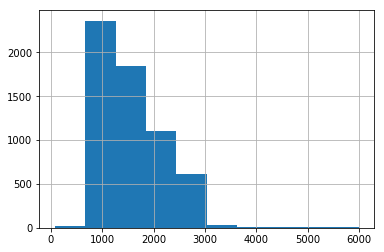

In [36]:
data.P_Engine.hist()

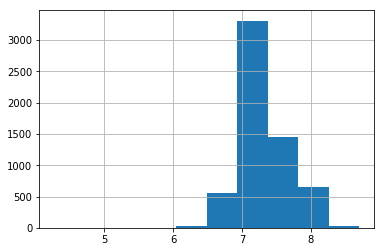

In [37]:
np.log(data.P_Engine).hist()

In [38]:
data['P_Engine']=np.log(data['P_Engine'])
test['P_Engine']=np.log(test['P_Engine'])

In [39]:
data.Seats.value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [41]:
data['Seats']= np.where(data['Seats']==0, 5, data['Seats'])

In [42]:
data[data['Seats'].isnull()].shape, test[test['Seats'].isnull()].shape

((42, 20), (11, 18))

In [43]:
data.Seats.fillna(0, inplace=True)
test.Seats.fillna(0, inplace=True)

In [44]:
c=[]
for index, row in data.iterrows():
    if row['Seats']==0:
        c.append(data[data['Car']==row['Car']]['Seats'].mean())
    else:
        c.append(row['Seats'])
        
data['Seats']=c

c=[]
for index, row in test.iterrows():
    if row['Seats']==0:
        c.append(data[data['Car']==row['Car']]['Seats'].mean())
    else:
        c.append(row['Seats'])
        
test['Seats']=c

In [45]:
data[data['Seats']==0].shape, test[test['Seats']==0].shape

((17, 20), (3, 18))

In [46]:
c=[]
for index, row in data.iterrows():
    if row['Seats']==0:
        c.append(data[data['Company']==row['Company']]['Seats'].mean())
    else:
        c.append(row['Seats'])
        
data['Seats']=c

c=[]
for index, row in test.iterrows():
    if row['Seats']==0:
        c.append(data[data['Company']==row['Company']]['Seats'].mean())
    else:
        c.append(row['Seats'])
        
test['Seats']=c

In [47]:
data[data['Seats']==0].shape, test[test['Seats']==0].shape

((0, 20), (0, 18))

In [55]:
def conv(item):
    return np.round(item)

data['Seats']=data['Seats'].apply(conv)
test['Seats']=test['Seats'].apply(conv)

In [57]:
test.Seats.value_counts()

5.0     1041
7.0      123
8.0       36
4.0       20
6.0        7
10.0       3
2.0        2
Name: Seats, dtype: int64

In [58]:
data.shape, test.shape

((6019, 20), (1234, 18))

In [59]:
data.to_csv('Processed.csv')
test.to_csv('Processed_Test.csv')

In [88]:
data = pd.read_csv('Processed.csv')
test = pd.read_csv('Processed_Test.csv')

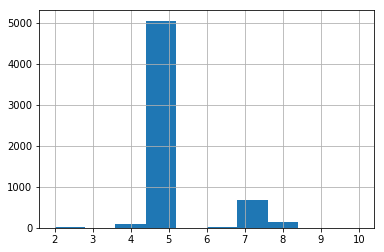

In [78]:
(data.Seats).hist()

In [89]:
test[(test.Mileage.isnull())].shape, data[(data.Mileage.isnull())].shape

((0, 19), (2, 21))

In [90]:
data.Mileage.fillna('-1', inplace=True)

In [91]:
def conv(item):
    #print(item)
    l = item.split()
    #print(l)
    return float(l[0])

data['Mileage']=data['Mileage'].apply(conv)
test['Mileage']=test['Mileage'].apply(conv)

In [93]:
data[data['Mileage']==-1].shape, test[test['Mileage']==-1].shape

((2, 21), (0, 19))

In [97]:
c=[]
for index, row in data.iterrows():
    if row['Mileage']==-1:
        c.append(data[(data['Year']==row['Year'])&(data['Company']==row['Company'])]['Mileage'].mean())
    else:
        c.append(row['Mileage'])
        
data['Mileage']=c

In [98]:
data[data['Mileage']==-1].shape, test[test['Mileage']==-1].shape

((0, 21), (0, 19))

In [99]:
data.shape, test.shape

((6019, 21), (1234, 19))

In [100]:
data.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

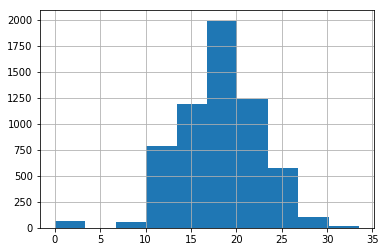

In [104]:
data.Mileage.hist()

In [106]:
data[data.Mileage==0].shape

(68, 21)

In [107]:
data.to_csv('Processed.csv')

In [214]:
data = pd.read_csv('Processed.csv')

In [108]:
test.to_csv('Processed_Test.csv')

In [215]:
test = pd.read_csv('Processed_Test.csv')

In [166]:
data.columns, test.columns

(Index(['Unnamed: 0', 'Unnamed: 0.1', 'Name', 'Location', 'Year',
        'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
        'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price', 'Company',
        'Car', 'Log_Price', 'P_Company', 'P_Car', 'P_Engine', 'P_Power'],
       dtype='object'),
 Index(['Unnamed: 0', 'Unnamed: 0.1', 'Name', 'Location', 'Year',
        'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
        'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Company', 'Car',
        'P_Company', 'P_Car', 'P_Engine', 'P_Power'],
       dtype='object'))

In [216]:
data.New_Price.fillna('-1 Lakh', inplace=True)
test.New_Price.fillna('-1 Lakh', inplace=True)

In [191]:
data.New_Price.value_counts()

-1 Lakh       5195
63.71 Lakh       6
4.78 Lakh        6
95.13 Lakh       6
11.26 Lakh       5
47.87 Lakh       5
44.28 Lakh       5
4.98 Lakh        5
11.67 Lakh       5
7.88 Lakh        4
6.62 Lakh        4
19.18 Lakh       4
10.32 Lakh       4
5.04 Lakh        4
7.63 Lakh        4
33.36 Lakh       4
28.05 Lakh       4
15.05 Lakh       4
12.56 Lakh       4
20.74 Lakh       4
11.15 Lakh       4
15.86 Lakh       4
11.27 Lakh       4
11.75 Lakh       4
8.1 Lakh         4
48.18 Lakh       4
8.78 Lakh        3
10.83 Lakh       3
11.47 Lakh       3
54.43 Lakh       3
              ... 
6 Lakh           1
22.37 Lakh       1
43.81 Lakh       1
22.86 Lakh       1
9.04 Lakh        1
69.47 Lakh       1
10.97 Lakh       1
2.3 Cr           1
24.63 Lakh       1
39.22 Lakh       1
9.09 Lakh        1
25.54 Lakh       1
23.37 Lakh       1
14.84 Lakh       1
9.36 Lakh        1
24.82 Lakh       1
9.44 Lakh        1
4.45 Lakh        1
8.82 Lakh        1
17.38 Lakh       1
7.77 Lakh        1
3.95 Lakh   

In [217]:
def conv(item):
    #print(item)
    string = item.split()
    if string[1]=='Cr':
        return float(string[0])*100
    else:
        return float(string[0])

data['P_New_Price']=data['New_Price'].apply(conv)
test['P_New_Price']=data['New_Price'].apply(conv)

In [194]:
data.P_New_Price.value_counts()

-1.00     5195
 95.13       6
 63.71       6
 4.78        6
 11.26       5
 4.98        5
 44.28       5
 11.67       5
 47.87       5
 48.18       4
 7.63        4
 15.86       4
 28.05       4
 33.36       4
 15.05       4
 7.88        4
 12.56       4
 11.15       4
 11.75       4
 20.74       4
 11.27       4
 6.62        4
 5.04        4
 19.18       4
 8.10        4
 10.32       4
 6.14        3
 5.61        3
 24.01       3
 48.79       3
          ... 
 17.00       1
 9.83        1
 66.39       1
 12.57       1
 8.82        1
 19.34       1
 8.12        1
 11.30       1
 10.94       1
 69.47       1
 5.45        1
 9.46        1
 20.48       1
 53.68       1
 8.03        1
 8.28        1
 67.67       1
 7.94        1
 15.34       1
 37.90       1
 33.58       1
 10.97       1
 8.38        1
 6.42        1
 23.14       1
 75.12       1
 57.30       1
 33.68       1
 4.80        1
 4.33        1
Name: P_New_Price, Length: 541, dtype: int64

In [218]:
data[data['P_New_Price']==-1].shape, test[test['P_New_Price']==-1].shape

((5195, 23), (1063, 21))

In [219]:
c=[]
for index, row in data.iterrows():
    if row['P_New_Price']==-1:
        c.append(data[(data['Car']==row['Car'])&(data['P_New_Price']!=-1)]['P_New_Price'].mean())
    else:
        c.append(row['P_New_Price'])
        
data['P_New_Price']=c

c=[]
for index, row in test.iterrows():
    if row['P_New_Price']==-1:
        c.append(data[(data['Car']==row['Car'])&(data['P_New_Price']!=-1)]['P_New_Price'].mean())
    else:
        c.append(row['P_New_Price'])
        
test['P_New_Price']=c

In [220]:
data[data['P_New_Price']==-1].shape, test[test['P_New_Price']==-1].shape

((0, 23), (0, 21))

In [207]:
data.P_New_Price.value_counts()

5.486571      119
7.346579      114
49.490000      94
8.055714       76
16.687500      71
52.929355      67
8.100000       56
68.545000      54
21.538462      39
15.037143      38
11.270000      35
6.995000       31
5.912000       30
8.067500       29
12.000000      26
136.268333     25
12.720000      24
4.403333       24
9.665000       20
6.950000       19
11.128750      18
4.803333       18
8.875000       17
12.540000      17
14.205455      16
10.001250      16
10.650000      14
40.455000      14
14.808000      14
48.180000      14
             ... 
9.790000        1
6.420000        1
23.140000       1
75.120000       1
57.300000       1
33.680000       1
10.940000       1
9.360000        1
99.920000       1
10.250000       1
95.040000       1
40.730000       1
11.690000       1
25.540000       1
5.360000        1
39.570000       1
7.460000        1
66.390000       1
12.570000       1
9.040000        1
8.910000        1
60.590000       1
71.150000       1
5.690000        1
8.850000  

In [210]:
data.loc[:,['New_Price','P_New_Price']]

,New_Price,P_New_Price
0,-1 Lakh,5.486571
1,-1 Lakh,16.687500
2,8.61 Lakh,8.610000
3,-1 Lakh,11.128750
4,-1 Lakh,NaN
5,-1 Lakh,NaN
6,-1 Lakh,NaN
7,21 Lakh,21.000000
8,-1 Lakh,NaN
9,-1 Lakh,NaN


In [221]:
data[data['P_New_Price'].isnull()].shape, test[test['P_New_Price'].isnull()].shape

((3804, 23), (712, 21))

In [226]:
data['T_New_Price']=data['P_New_Price']
test['T_New_Price']=test['P_New_Price']

In [228]:
data['T_New_Price'].fillna(-1, inplace=True)
test['T_New_Price'].fillna(-1, inplace=True)

In [230]:
c=[]
for index, row in data.iterrows():
    if row['T_New_Price']==-1:
        c.append(data[(data['Company']==row['Company'])&(data['T_New_Price']!=-1)]['T_New_Price'].mean())
    else:
        c.append(row['T_New_Price'])
        
data['G_New_Price']=c

c=[]
for index, row in test.iterrows():
    if row['T_New_Price']==-1:
        c.append(data[(data['Company']==row['Company'])&(data['T_New_Price']!=-1)]['T_New_Price'].mean())
    else:
        c.append(row['T_New_Price'])
        
test['G_New_Price']=c

In [231]:
data[data['G_New_Price'].isnull()].shape, test[test['G_New_Price'].isnull()].shape

((130, 25), (33, 23))

In [238]:
data[data.Company=='Chevrolet']['Car'].value_counts()

Beat Diesel       21
Cruze LTZ         18
Beat LT           13
Beat LS           11
Spark 1.0         10
Optra Magnum       9
Aveo U-VA          7
Aveo 1.4           6
Sail Hatchback     4
Sail 1.2           3
Optra 1.6          3
Enjoy 1.3          3
Enjoy TCDi         3
Enjoy Petrol       2
Beat Option        1
Captiva LTZ        1
Tavera LS          1
Enjoy 1.4          1
Aveo 1.6           1
Tavera LT          1
Sail LT            1
Captiva LT         1
Name: Car, dtype: int64

In [286]:
test[test['Company']=='Chevrolet'].shape

(30, 23)

In [283]:
grouped = data[(data['Company']=='Chevrolet')].loc[:,['Price','Car']].groupby('Car').median()

In [284]:
grouped

,Price
Car,
Aveo 1.4,1.595
Aveo 1.6,1.200
Aveo U-VA,1.150
Beat Diesel,2.500
Beat LS,2.210
Beat LT,2.210
Beat Option,1.500
Captiva LT,3.500
Captiva LTZ,4.000


In [234]:
data[data.Company=='Chevrolet']['New_Price'].value_counts()

-1 Lakh    121
Name: New_Price, dtype: int64

In [233]:
data[data['G_New_Price'].isnull()]['New_Price'].head(5)

145    -1 Lakh
179    -1 Lakh
183    -1 Lakh
231    -1 Lakh
240    -1 Lakh
Name: New_Price, dtype: object

In [513]:
test.shape, data.shape

((1234, 26), (6017, 27))

In [287]:
data.to_csv('Processed.csv')
test.to_csv('Processed_Test.csv')

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('Processed.csv')
test = pd.read_csv('Processed_Test.csv')

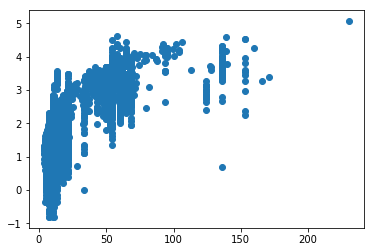

In [19]:
plt.scatter(data.G_New_Price, data.Log_Price)

In [22]:
data[data['G_New_Price'].isnull()]['Company'].value_counts()

Chevrolet      121
Force            3
ISUZU            2
Bentley          1
Smart            1
Ambassador       1
Lamborghini      1
Name: Company, dtype: int64

In [28]:
data['G_New_Price']=np.where(data['Car']=='Cruze LTZ',15,data['G_New_Price'])
test['G_New_Price']=np.where(test['Car']=='Cruze LTZ',15,test['G_New_Price'])

In [29]:
data['G_New_Price']=np.where((data['Company']=='Chevrolet')&(data['Car']!='Cruze LTZ'),8.5,data['G_New_Price'])
test['G_New_Price']=np.where((test['Company']=='Chevrolet')&(test['Car']!='Cruze LTZ'),8.5,test['G_New_Price'])

In [27]:
data[data['G_New_Price'].isnull()]['Company'].value_counts()

Force          3
ISUZU          2
Lamborghini    1
Smart          1
Bentley        1
Ambassador     1
Name: Company, dtype: int64

In [30]:
test[test.G_New_Price.isnull()]['Company'].value_counts()

Hindustan    1
OpelCorsa    1
ISUZU        1
Bentley      1
Name: Company, dtype: int64

In [31]:
data.to_csv('Processed.csv')
test.to_csv('Processed_Test.csv')

In [32]:
data.shape, test.shape

((6019, 26), (1234, 24))

In [33]:
data.columns, test.columns

(Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Name', 'Location',
        'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
        'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price', 'Company',
        'Car', 'Log_Price', 'P_Company', 'P_Car', 'P_Engine', 'P_Power',
        'P_New_Price', 'G_New_Price', 'T_New_Price'],
       dtype='object'),
 Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Name', 'Location',
        'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
        'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Company', 'Car',
        'P_Company', 'P_Car', 'P_Engine', 'P_Power', 'P_New_Price',
        'G_New_Price', 'T_New_Price'],
       dtype='object'))

In [35]:
data = pd.read_csv('Processed.csv')
test = pd.read_csv('Processed_Test.csv')

### Categorical Encoding

In [38]:
data.columns.tolist()

['Unnamed: 0',
 'Unnamed: 0.1',
 'Unnamed: 0.1.1',
 'Unnamed: 0.1.1.1',
 'Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price',
 'Company',
 'Car',
 'Log_Price',
 'P_Company',
 'P_Car',
 'P_Engine',
 'P_Power',
 'P_New_Price',
 'G_New_Price',
 'T_New_Price']

In [39]:
encoder = ce.TargetEncoder(cols=['Location',
 'Year','Fuel_Type',
 'Transmission',
 'Owner_Type','Seats','Company',
 'Car'])

In [40]:
encoder.fit(data, data['Log_Price'])

TargetEncoder(cols=['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Company', 'Car'],
       drop_invariant=False, handle_missing='value',
       handle_unknown='value', min_samples_leaf=1, return_df=True,
       smoothing=1.0, verbose=0)

In [ ]:
encoder.transform

In [534]:
c_grouped = data.groupby('P_Company')

In [535]:
import warnings
warnings.filterwarnings('ignore')

In [536]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)

In [537]:
c_grouped = data.groupby('P_Company')
list_data=[]
list_data2=[]

for key, item in c_grouped:
    print('in company')
    kf.get_n_splits(item)
    mini_list_data=[]
    mini_list_data2=[]
    for train_index, test_index in kf.split(item):
        item_train, item_test = item.iloc[train_index], item.iloc[test_index]
        item_test['P_Company_Mean']=item_train.Price.mean()
        item_test['P_Company_Median']=item_train.Price.median()
        mini_list_data.append(item_test['P_Company_Mean'])
        mini_list_data2.append(item_test['P_Company_Median'])
    list2=[]
    for df in mini_list_data:
        list2.append(df.values)

    g = []
    for i in list2:
        for k in i:
            g.append(k)

    d = []
    for i in g:
        if(i==0):
            i = imp_avg
        if(i == -1):
            i = non_imp_avg
        d.append(i) 
        
    item['P_Company_Mean'] = d
    
    list2=[]
    for df in mini_list_data2:
        list2.append(df.values)

    g = []
    for i in list2:
        for k in i:
            g.append(k)

    d = []
    for i in g:
        if(i==0):
            i = imp_avg
        if(i == -1):
            i = non_imp_avg
        d.append(i) 
        
    item['P_Company_Median'] = d
    
    list_data.append(item['P_Company_Mean'])
    list_data2.append(item['P_Company_Median'])

list1=[]
for df in list_data:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    if(i==0):
        i = imp_avg
    if(i == -1):
        i = non_imp_avg
    d.append(i) 
data['P_Company_Mean'] = d

list1=[]
for df in list_data2:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    d.append(i) 
data['P_Company_Median'] = d

in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company


In [538]:
grouped = test.groupby('P_Company')

list_data=[]
list_data2=[]

for key, item in grouped:
    print('in company')
    item['P_Company_Mean']=data[data['P_Company']==key]['Price'].mean()
    item['P_Company_Median']=data[data['P_Company']==key]['Price'].median()
    list_data.append(item['P_Company_Mean'])
    list_data2.append(item['P_Company_Median'])

list1=[]
for df in list_data:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    d.append(i) 
print(len(d),test.shape)  
test['P_Company_Mean'] = d

list1=[]
for df in list_data2:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    d.append(i) 

print(len(d),test.shape)
test['P_Company_Median'] = d

in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
1234 (1234, 27)
1234 (1234, 28)


In [539]:
len(list_data), len(list_data2)

(17, 17)

In [540]:
c_grouped = data.groupby('Location')
list_data=[]
list_data2=[]

for key, item in c_grouped:
    print('in location')
    kf.get_n_splits(item)
    mini_list_data=[]
    mini_list_data2=[]
    for train_index, test_index in kf.split(item):
        item_train, item_test = item.iloc[train_index], item.iloc[test_index]
        item_test['P_Location_Mean']=item_train.Price.mean()
        item_test['P_Location_Median']=item_train.Price.median()
        mini_list_data.append(item_test['P_Location_Mean'])
        mini_list_data2.append(item_test['P_Location_Median'])
    list2=[]
    for df in mini_list_data:
        list2.append(df.values)

    g = []
    for i in list2:
        for k in i:
            g.append(k)

    d = []
    for i in g:
        if(i==0):
            i = imp_avg
        if(i == -1):
            i = non_imp_avg
        d.append(i) 
        
    item['P_Location_Mean'] = d
    
    list2=[]
    for df in mini_list_data2:
        list2.append(df.values)

    g = []
    for i in list2:
        for k in i:
            g.append(k)

    d = []
    for i in g:
        if(i==0):
            i = imp_avg
        if(i == -1):
            i = non_imp_avg
        d.append(i) 
        
    item['P_Location_Median'] = d
    
    #print(len(d))
    #print(len(item))
    list_data.append(item['P_Location_Mean'])
    list_data2.append(item['P_Location_Median'])

list1=[]
for df in list_data:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    if(i==0):
        i = imp_avg
    if(i == -1):
        i = non_imp_avg
    d.append(i) 
data['P_Location_Mean'] = d

list1=[]
for df in list_data2:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    if(i==0):
        i = imp_avg
    if(i == -1):
        i = non_imp_avg
    d.append(i) 
data['P_Location_Median'] = d

in location
in location
in location
in location
in location
in location
in location
in location
in location
in location
in location


In [541]:
grouped = test.groupby('Location')

list_data=[]
list_data2=[]

for key, item in grouped:
    print('in company')
    item['Location_Mean']=data[data['Location']==key]['Price'].mean()
    item['Location_Median']=data[data['Location']==key]['Price'].median()
    list_data.append(item['Location_Mean'])
    list_data2.append(item['Location_Median'])

list1=[]
for df in list_data:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    d.append(i) 
print(len(d),test.shape)  
test['Location_Mean'] = d

list1=[]
for df in list_data2:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    d.append(i) 

print(len(d),test.shape)
test['Location_Median'] = d

in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
1234 (1234, 29)
1234 (1234, 30)


In [542]:
c_grouped = data.groupby('P_Year')
list_data=[]
list_data2=[]

for key, item in c_grouped:
    print('in year')
    kf.get_n_splits(item)
    mini_list_data=[]
    mini_list_data2=[]
    for train_index, test_index in kf.split(item):
        item_train, item_test = item.iloc[train_index], item.iloc[test_index]
        item_test['P_Year_Mean']=item_train.Price.mean()
        item_test['P_Year_Median']=item_train.Price.median()
        mini_list_data.append(item_test['P_Year_Mean'])
        mini_list_data2.append(item_test['P_Year_Median'])
    list2=[]
    for df in mini_list_data:
        list2.append(df.values)

    g = []
    for i in list2:
        for k in i:
            g.append(k)

    d = []
    for i in g:
        if(i==0):
            i = imp_avg
        if(i == -1):
            i = non_imp_avg
        d.append(i) 
        
    item['P_Year_Mean'] = d
    
    list2=[]
    for df in mini_list_data2:
        list2.append(df.values)

    g = []
    for i in list2:
        for k in i:
            g.append(k)

    d = []
    for i in g:
        if(i==0):
            i = imp_avg
        if(i == -1):
            i = non_imp_avg
        d.append(i) 
        
    item['P_Year_Median'] = d
    
    #print(len(d))
    #print(len(item))
    list_data.append(item['P_Year_Mean'])
    list_data2.append(item['P_Year_Median'])

list1=[]
for df in list_data:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    if(i==0):
        i = imp_avg
    if(i == -1):
        i = non_imp_avg
    d.append(i) 
data['P_Year_Mean'] = d

list1=[]
for df in list_data2:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    if(i==0):
        i = imp_avg
    if(i == -1):
        i = non_imp_avg
    d.append(i) 
data['P_Year_Median'] = d

in year
in year
in year
in year
in year
in year
in year
in year
in year
in year
in year
in year
in year
in year
in year
in year
in year
in year
in year


In [543]:
grouped = test.groupby('P_Year')

list_data=[]
list_data2=[]

for key, item in grouped:
    print('in company')
    item['P_Year_Mean']=data[data['P_Year']==key]['Price'].mean()
    item['P_Year_Median']=data[data['P_Year']==key]['Price'].median()
    list_data.append(item['P_Year_Mean'])
    list_data2.append(item['P_Year_Median'])

list1=[]
for df in list_data:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    d.append(i) 
print(len(d),test.shape)  
test['P_Year_Mean'] = d

list1=[]
for df in list_data2:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    d.append(i) 

print(len(d),test.shape)
test['P_Year_Median'] = d

in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
in company
1234 (1234, 31)
1234 (1234, 32)


In [544]:
data.columns, test.columns

(Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
        'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
        'Seats', 'New_Price', 'Price', 'Company', 'P_Company', 'P_Year',
        'P_Mileage', 'P_Engine', 'P1_Engine', 'P2_Engine', 'P_Power',
        'P1_Power', 'P2_Power', 'P3_Power', 'P_Seats', 'G_New_Price',
        'G_New_Price1', 'P_Company_Mean', 'P_Company_Median', 'P_Location_Mean',
        'P_Location_Median', 'P_Year_Mean', 'P_Year_Median'],
       dtype='object'),
 Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
        'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
        'Seats', 'New_Price', 'Company', 'P_Company', 'P_Year', 'P_Mileage',
        'P_Engine', 'P1_Engine', 'P2_Engine', 'P_Power', 'P1_Power', 'P2_Power',
        'P3_Power', 'P_Seats', 'G_New_Price', 'G_New_Price1', 'P_Company_Mean',
        'P_Company_Median', 'Location_Mean', 'Location_Median', 'P_Year_Mean',

In [545]:
data.to_csv('Features.csv')
test.to_csv('Features_Test.csv')

In [546]:
data['Now']=2019.5
test['Now']=2019.5

In [547]:
data['Kmpm']=data['Kilometers_Driven']/((data['Now']-data['Year'])*12)
test['Kmpm']=test['Kilometers_Driven']/((test['Now']-test['Year'])*12)

In [548]:
data.columns, test.columns

(Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
        'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
        'Seats', 'New_Price', 'Price', 'Company', 'P_Company', 'P_Year',
        'P_Mileage', 'P_Engine', 'P1_Engine', 'P2_Engine', 'P_Power',
        'P1_Power', 'P2_Power', 'P3_Power', 'P_Seats', 'G_New_Price',
        'G_New_Price1', 'P_Company_Mean', 'P_Company_Median', 'P_Location_Mean',
        'P_Location_Median', 'P_Year_Mean', 'P_Year_Median', 'Now', 'Kmpm'],
       dtype='object'),
 Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
        'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
        'Seats', 'New_Price', 'Company', 'P_Company', 'P_Year', 'P_Mileage',
        'P_Engine', 'P1_Engine', 'P2_Engine', 'P_Power', 'P1_Power', 'P2_Power',
        'P3_Power', 'P_Seats', 'G_New_Price', 'G_New_Price1', 'P_Company_Mean',
        'P_Company_Median', 'Location_Mean', 'Location_Median',

In [549]:
data.to_csv('Features.csv')
test.to_csv('Features_test.csv')

In [550]:
data.shape, test.shape

((6017, 36), (1234, 35))

In [551]:
data.Transmission.value_counts()

Manual       4299
Automatic    1718
Name: Transmission, dtype: int64

In [552]:
c_grouped = data.groupby('Transmission')
list_data=[]
list_data2=[]

for key, item in c_grouped:
    print('in trans')
    kf.get_n_splits(item)
    mini_list_data=[]
    mini_list_data2=[]
    for train_index, test_index in kf.split(item):
        item_train, item_test = item.iloc[train_index], item.iloc[test_index]
        item_test['P_Transmission_Mean']=item_train.Price.mean()
        item_test['P_Transmission_Median']=item_train.Price.median()
        mini_list_data.append(item_test['P_Transmission_Mean'])
        mini_list_data2.append(item_test['P_Transmission_Median'])
    list2=[]
    for df in mini_list_data:
        list2.append(df.values)

    g = []
    for i in list2:
        for k in i:
            g.append(k)

    d = []
    for i in g:
        if(i==0):
            i = imp_avg
        if(i == -1):
            i = non_imp_avg
        d.append(i) 
        
    item['P_Transmission_Mean'] = d
    
    list2=[]
    for df in mini_list_data2:
        list2.append(df.values)

    g = []
    for i in list2:
        for k in i:
            g.append(k)

    d = []
    for i in g:
        if(i==0):
            i = imp_avg
        if(i == -1):
            i = non_imp_avg
        d.append(i) 
        
    item['P_Transmission_Median'] = d
    
    #print(len(d))
    #print(len(item))
    list_data.append(item['P_Transmission_Mean'])
    list_data2.append(item['P_Transmission_Median'])

list1=[]
for df in list_data:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    if(i==0):
        i = imp_avg
    if(i == -1):
        i = non_imp_avg
    d.append(i) 
data['P_Transmission_Mean'] = d

list1=[]
for df in list_data2:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    if(i==0):
        i = imp_avg
    if(i == -1):
        i = non_imp_avg
    d.append(i) 
data['P_Transmission_Median'] = d

in trans
in trans


In [553]:
grouped = test.groupby('Transmission')

list_data=[]
list_data2=[]

for key, item in grouped:
    print('in company')
    item['P_Transmission_Mean']=data[data['Transmission']==key]['Price'].mean()
    item['P_Transmission_Median']=data[data['Transmission']==key]['Price'].median()
    list_data.append(item['P_Transmission_Mean'])
    list_data2.append(item['P_Transmission_Median'])

list1=[]
for df in list_data:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    d.append(i) 
print(len(d),test.shape)  
test['P_Transmission_Mean'] = d

list1=[]
for df in list_data2:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    d.append(i) 

print(len(d),test.shape)
test['P_Transmission_Median'] = d

in company
in company
1234 (1234, 35)
1234 (1234, 36)


In [554]:
c_grouped = data.groupby('Fuel_Type')
list_data=[]
list_data2=[]

for key, item in c_grouped:
    print('in trans')
    kf.get_n_splits(item)
    mini_list_data=[]
    mini_list_data2=[]
    for train_index, test_index in kf.split(item):
        item_train, item_test = item.iloc[train_index], item.iloc[test_index]
        item_test['P_Fuel_Mean']=item_train.Price.mean()
        item_test['P_Fuel_Median']=item_train.Price.median()
        mini_list_data.append(item_test['P_Fuel_Mean'])
        mini_list_data2.append(item_test['P_Fuel_Median'])
    list2=[]
    for df in mini_list_data:
        list2.append(df.values)

    g = []
    for i in list2:
        for k in i:
            g.append(k)

    d = []
    for i in g:
        if(i==0):
            i = imp_avg
        if(i == -1):
            i = non_imp_avg
        d.append(i) 
        
    item['P_Fuel_Mean'] = d
    
    list2=[]
    for df in mini_list_data2:
        list2.append(df.values)

    g = []
    for i in list2:
        for k in i:
            g.append(k)

    d = []
    for i in g:
        if(i==0):
            i = imp_avg
        if(i == -1):
            i = non_imp_avg
        d.append(i) 
        
    item['P_Fuel_Median'] = d
    
    #print(len(d))
    #print(len(item))
    list_data.append(item['P_Fuel_Mean'])
    list_data2.append(item['P_Fuel_Median'])

list1=[]
for df in list_data:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    if(i==0):
        i = imp_avg
    if(i == -1):
        i = non_imp_avg
    d.append(i) 
data['P_Fuel_Mean'] = d

list1=[]
for df in list_data2:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    if(i==0):
        i = imp_avg
    if(i == -1):
        i = non_imp_avg
    d.append(i) 
data['P_Fuel_Median'] = d

in trans
in trans
in trans
in trans


In [555]:
grouped = test.groupby('Fuel_Type')

list_data=[]
list_data2=[]

for key, item in grouped:
    print('in company')
    item['P_Fuel_Mean']=data[data['Fuel_Type']==key]['Price'].mean()
    item['P_Fuel_Median']=data[data['Fuel_Type']==key]['Price'].median()
    list_data.append(item['P_Fuel_Mean'])
    list_data2.append(item['P_Fuel_Median'])

list1=[]
for df in list_data:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    d.append(i) 
print(len(d),test.shape)  
test['P_Fuel_Mean'] = d

list1=[]
for df in list_data2:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    d.append(i) 

print(len(d),test.shape)
test['P_Fuel_Median'] = d

in company
in company
in company
in company
1234 (1234, 37)
1234 (1234, 38)


In [556]:
c_grouped = data.groupby('Owner_Type')
list_data=[]
list_data2=[]

for key, item in c_grouped:
    print('in trans')
    kf.get_n_splits(item)
    mini_list_data=[]
    mini_list_data2=[]
    for train_index, test_index in kf.split(item):
        item_train, item_test = item.iloc[train_index], item.iloc[test_index]
        item_test['P_Owner_Mean']=item_train.Price.mean()
        item_test['P_Owner_Median']=item_train.Price.median()
        mini_list_data.append(item_test['P_Owner_Mean'])
        mini_list_data2.append(item_test['P_Owner_Median'])
    list2=[]
    for df in mini_list_data:
        list2.append(df.values)

    g = []
    for i in list2:
        for k in i:
            g.append(k)

    d = []
    for i in g:
        if(i==0):
            i = imp_avg
        if(i == -1):
            i = non_imp_avg
        d.append(i) 
        
    item['P_Owner_Mean'] = d
    
    list2=[]
    for df in mini_list_data2:
        list2.append(df.values)

    g = []
    for i in list2:
        for k in i:
            g.append(k)

    d = []
    for i in g:
        if(i==0):
            i = imp_avg
        if(i == -1):
            i = non_imp_avg
        d.append(i) 
        
    item['P_Owner_Median'] = d
    
    #print(len(d))
    #print(len(item))
    list_data.append(item['P_Owner_Mean'])
    list_data2.append(item['P_Owner_Median'])

list1=[]
for df in list_data:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    if(i==0):
        i = imp_avg
    if(i == -1):
        i = non_imp_avg
    d.append(i) 
data['P_Owner_Mean'] = d

list1=[]
for df in list_data2:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    if(i==0):
        i = imp_avg
    if(i == -1):
        i = non_imp_avg
    d.append(i) 
data['P_Owner_Median'] = d

in trans
in trans
in trans
in trans


In [557]:
grouped = test.groupby('Owner_Type')

list_data=[]
list_data2=[]

for key, item in grouped:
    print('in company')
    item['P_Owner_Mean']=data[data['Owner_Type']==key]['Price'].mean()
    item['P_Owner_Median']=data[data['Owner_Type']==key]['Price'].median()
    list_data.append(item['P_Owner_Mean'])
    list_data2.append(item['P_Owner_Median'])

list1=[]
for df in list_data:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    d.append(i) 
print(len(d),test.shape)  
test['P_Owner_Mean'] = d

list1=[]
for df in list_data2:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    d.append(i) 

print(len(d),test.shape)
test['P_Owner_Median'] = d

in company
in company
in company
in company
1234 (1234, 39)
1234 (1234, 40)


In [558]:
test.P_Transmission_Mean.value_counts()

5.332703     905
19.852084    329
Name: P_Transmission_Mean, dtype: int64

In [559]:
test.Transmission.value_counts()

Manual       905
Automatic    329
Name: Transmission, dtype: int64

In [560]:
len(item)

24

In [561]:
data.Seats.value_counts()

5.0     5012
7.0      674
8.0      134
4.0       99
0.0       43
6.0       31
2.0       16
10.0       5
9.0        3
Name: Seats, dtype: int64

In [562]:
c_grouped = data.groupby('Seats')
list_data=[]
list_data2=[]

kf=KFold(n_splits=3)

for key, item in c_grouped:
    print('in trans')
    print(len(item))
    kf.get_n_splits(item)
    mini_list_data=[]
    mini_list_data2=[]
    for train_index, test_index in kf.split(item):
        item_train, item_test = item.iloc[train_index], item.iloc[test_index]
        item_test['P_Seats_Mean']=item_train.Price.mean()
        item_test['P_Seats_Median']=item_train.Price.median()
        mini_list_data.append(item_test['P_Seats_Mean'])
        mini_list_data2.append(item_test['P_Seats_Median'])
    list2=[]
    for df in mini_list_data:
        list2.append(df.values)

    g = []
    for i in list2:
        for k in i:
            g.append(k)

    d = []
    for i in g:
        if(i==0):
            i = imp_avg
        if(i == -1):
            i = non_imp_avg
        d.append(i) 
        
    item['P_Seats_Mean'] = d
    
    list2=[]
    for df in mini_list_data2:
        list2.append(df.values)

    g = []
    for i in list2:
        for k in i:
            g.append(k)

    d = []
    for i in g:
        if(i==0):
            i = imp_avg
        if(i == -1):
            i = non_imp_avg
        d.append(i) 
        
    item['P_Seats_Median'] = d
    
    #print(len(d))
    #print(len(item))
    list_data.append(item['P_Seats_Mean'])
    list_data2.append(item['P_Seats_Median'])

list1=[]
for df in list_data:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    if(i==0):
        i = imp_avg
    if(i == -1):
        i = non_imp_avg
    d.append(i) 
data['P_Seats_Mean'] = d

list1=[]
for df in list_data2:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    if(i==0):
        i = imp_avg
    if(i == -1):
        i = non_imp_avg
    d.append(i) 
data['P_Seats_Median'] = d

in trans
43
in trans
16
in trans
99
in trans
5012
in trans
31
in trans
674
in trans
134
in trans
3
in trans
5


In [563]:
grouped = test.groupby('Seats')

list_data=[]
list_data2=[]

for key, item in grouped:
    print('in company')
    item['P_Seats_Mean']=data[data['Seats']==key]['Price'].mean()
    item['P_Seats_Median']=data[data['Seats']==key]['Price'].median()
    list_data.append(item['P_Seats_Mean'])
    list_data2.append(item['P_Seats_Median'])

list1=[]
for df in list_data:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    d.append(i) 
print(len(d),test.shape)  
test['P_Seats_Mean'] = d

list1=[]
for df in list_data2:
    list1.append(df.values)

g = []
for i in list1:
    for k in i:
        g.append(k)

d = []
for i in g:
    d.append(i) 

print(len(d),test.shape)
test['P_Seats_Median'] = d

in company
in company
in company
in company
in company
in company
in company
in company
1234 (1234, 41)
1234 (1234, 42)


In [564]:
data.to_csv('Features.csv')
test.to_csv('Features_test.csv')

In [565]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price,P_Year,P_Mileage,P_Engine,P2_Engine,P_Power,...,Now,Kmpm,P_Transmission_Mean,P_Transmission_Median,P_Fuel_Mean,P_Fuel_Median,P_Owner_Mean,P_Owner_Median,P_Seats_Mean,P_Seats_Median
count,6017.000000,6017.000000,6.017000e+03,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,...,6017.0,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000
mean,3008.446236,2013.358152,5.874228e+04,5.241981,9.478340,2007.375436,18.134961,1611.804388,1620.240651,110.580176,...,2019.5,952.839858,9.478294,7.820894,9.478334,6.035426,9.478391,5.586566,9.480672,6.061737
std,1737.698200,3.269967,9.128375e+04,0.918167,11.189605,110.012896,4.582289,612.225215,600.749571,55.956056,...,0.0,2877.567400,6.559645,5.215807,3.599409,1.833873,1.100284,0.728112,3.526656,3.377011
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000,0.000000,0.000000,0.000000,599.000000,0.000000,...,2019.5,8.406667,5.311623,4.500000,2.365000,2.310000,2.860000,2.350000,3.975000,2.950000
25%,1504.000000,2011.000000,3.400000e+04,5.000000,3.500000,2011.000000,15.170000,1197.000000,1197.000000,74.000000,...,2019.5,527.117647,5.323930,4.500000,5.688302,4.100000,9.745854,5.870000,8.272658,5.160000
50%,3008.000000,2014.000000,5.300000e+04,5.000000,5.640000,2014.000000,18.150000,1493.000000,1493.000000,91.100000,...,2019.5,764.705882,5.347627,4.550000,12.766817,7.700000,9.954499,5.900000,8.481727,5.200000
75%,4513.000000,2016.000000,7.300000e+04,5.000000,9.950000,2016.000000,21.100000,1969.000000,1984.000000,138.030000,...,2019.5,1092.424242,19.560444,15.470000,12.816689,7.750000,10.051405,5.950000,8.676726,5.250000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000,2019.000000,33.540000,5998.000000,5998.000000,560.000000,...,2019.5,216666.666667,20.260953,16.500000,12.922184,7.800000,10.087788,5.950000,64.635000,61.270000


In [566]:
data.columns, test.columns, data.shape, test.shape

(Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
        'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
        'Seats', 'New_Price', 'Price', 'Company', 'P_Company', 'P_Year',
        'P_Mileage', 'P_Engine', 'P1_Engine', 'P2_Engine', 'P_Power',
        'P1_Power', 'P2_Power', 'P3_Power', 'P_Seats', 'G_New_Price',
        'G_New_Price1', 'P_Company_Mean', 'P_Company_Median', 'P_Location_Mean',
        'P_Location_Median', 'P_Year_Mean', 'P_Year_Median', 'Now', 'Kmpm',
        'P_Transmission_Mean', 'P_Transmission_Median', 'P_Fuel_Mean',
        'P_Fuel_Median', 'P_Owner_Mean', 'P_Owner_Median', 'P_Seats_Mean',
        'P_Seats_Median'],
       dtype='object'),
 Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
        'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
        'Seats', 'New_Price', 'Company', 'P_Company', 'P_Year', 'P_Mileage',
        'P_Engine', 'P1_Engine', 'P2_Engine', 'P_Pow

In [567]:
test.rename(columns={'Location_Mean':'P_Location_Mean','Location_Median':'P_Location_Median'}, inplace=True)

In [569]:
test.to_csv('Features_test.csv')

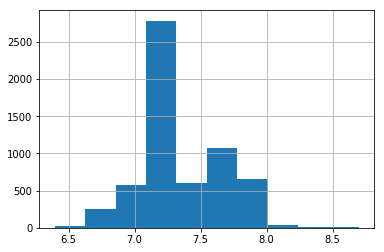

In [574]:
np.log(data.P2_Engine).hist()

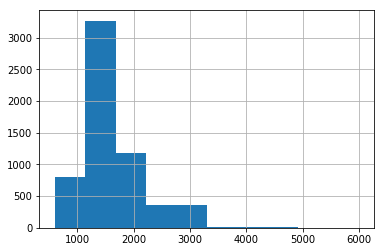

In [575]:
(data.P2_Engine).hist()

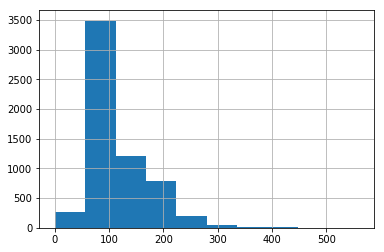

In [576]:
data.P3_Power.hist()

In [578]:
check = np.where(data.P3_Power==0, 0.001, data.P3_Power)

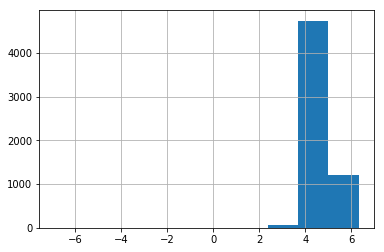

In [580]:
np.log(pd.Series(check)).hist()

In [581]:
data.columns.tolist()

['Unnamed: 0',
 'Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price',
 'Company',
 'P_Company',
 'P_Year',
 'P_Mileage',
 'P_Engine',
 'P1_Engine',
 'P2_Engine',
 'P_Power',
 'P1_Power',
 'P2_Power',
 'P3_Power',
 'P_Seats',
 'G_New_Price',
 'G_New_Price1',
 'P_Company_Mean',
 'P_Company_Median',
 'P_Location_Mean',
 'P_Location_Median',
 'P_Year_Mean',
 'P_Year_Median',
 'Now',
 'Kmpm',
 'P_Transmission_Mean',
 'P_Transmission_Median',
 'P_Fuel_Mean',
 'P_Fuel_Median',
 'P_Owner_Mean',
 'P_Owner_Median',
 'P_Seats_Mean',
 'P_Seats_Median']

In [6]:
import pandas as pd
import numpy as np
data=pd.read_csv('Features.csv')
test=pd.read_csv('Features_test.csv')

In [3]:
'''
data['P3_Engine']=np.log(data['P2_Engine'])
test['P3_Engine']=np.log(test['P2_Engine'])

data['P4_Power']=np.log(data['P3_Power'])
test['P4_Power']=np.log(test['P3_Power'])
'''

In [7]:
cols = ['P2_Engine', 'P3_Power', 'P_Mileage', 'Kilometers_Driven', 'G_New_Price', 'G_New_Price1', 'P_Company_Mean',
       'P_Company_Median', 'P_Year_Mean', 'P_Year_Median', 'P_Location_Mean', 'P_Location_Median','Kmpm', 'P_Transmission_Mean', 'P_Transmission_Median','P_Owner_Mean','P_Owner_Median','P_Fuel_Mean','P_Fuel_Median','P_Seats_Median','P_Seats_Mean']

data_p = data.loc[:,cols]

In [5]:
for col in cols:
    print(data[data[col]==0].shape, col, test[test[col]==0].shape)

(0, 48) P3_Engine (0, 47)
(0, 48) P4_Power (0, 47)
(68, 48) P_Mileage (13, 47)
(0, 48) Kilometers_Driven (0, 47)
(0, 48) G_New_Price (0, 47)
(0, 48) G_New_Price1 (0, 47)
(0, 48) P_Company_Mean (0, 47)
(0, 48) P_Company_Median (0, 47)
(0, 48) P_Year_Mean (0, 47)
(0, 48) P_Year_Median (0, 47)
(0, 48) P_Location_Mean (0, 47)
(0, 48) P_Location_Median (0, 47)
(0, 48) Kmpm (0, 47)
(0, 48) P_Transmission_Mean (0, 47)
(0, 48) P_Transmission_Median (0, 47)
(0, 48) P_Owner_Mean (0, 47)
(0, 48) P_Owner_Median (0, 47)
(0, 48) P_Fuel_Mean (0, 47)
(0, 48) P_Fuel_Median (0, 47)
(0, 48) P_Seats_Median (0, 47)
(0, 48) P_Seats_Mean (0, 47)


In [662]:
for col in cols:
    data[col]=np.log(data[col])
    
for col in cols:
    test[col]=np.log(test[col])

In [663]:
data.to_csv('Normalized_Features.csv')
test.to_csv('Normalized_Features_Test.csv')

In [8]:
from sklearn import preprocessing
x = pd.DataFrame(data_p) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_p= x_scaled

D:\samadrita.ghosh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
data_p.shape

(6017, 21)

In [10]:
data_p=pd.DataFrame(data_p, columns=cols)

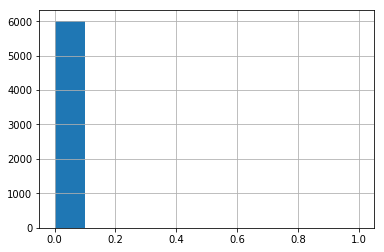

In [12]:
data_p.Kilometers_Driven.hist()

In [13]:
data_p.columns

Index(['P2_Engine', 'P3_Power', 'P_Mileage', 'Kilometers_Driven',
       'G_New_Price', 'G_New_Price1', 'P_Company_Mean', 'P_Company_Median',
       'P_Year_Mean', 'P_Year_Median', 'P_Location_Mean', 'P_Location_Median',
       'Kmpm', 'P_Transmission_Mean', 'P_Transmission_Median', 'P_Owner_Mean',
       'P_Owner_Median', 'P_Fuel_Mean', 'P_Fuel_Median', 'P_Seats_Median',
       'P_Seats_Mean'],
      dtype='object')

In [701]:
data.P_Fuel_Median.value_counts()

7.750    1923
4.100    1098
7.800     641
7.700     641
4.130     550
4.150     549
4.040     549
3.250      33
3.255      12
3.150      11
2.600       4
2.560       2
2.850       2
2.310       2
Name: P_Fuel_Median, dtype: int64

In [14]:
for col in data_p.columns:
    data[col]=data_p[col]

In [15]:
test_p = test.loc[:,cols]

In [16]:
x = pd.DataFrame(test_p) #returns a numpy array
x_scaled = min_max_scaler.transform(x)
test_p= x_scaled

In [17]:
test_p=pd.DataFrame(test_p,columns=cols)

In [18]:
for col in test_p.columns:
    test[col]=test_p[col]

In [19]:
data.to_csv('Normalized_Features.csv')
test.to_csv('Normalized_Features_Test.csv')

In [595]:
test.shape

(1234, 43)

In [596]:
data.isnull().sum()

Unnamed: 0                  0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_Price                5194
Price                       0
Company                     0
P_Company                   0
P_Year                      0
P_Mileage                   0
P_Engine                    0
P1_Engine                   0
P2_Engine                   0
P_Power                     0
P1_Power                    0
P2_Power                    0
P3_Power                    0
P_Seats                     0
G_New_Price                 0
G_New_Price1             5006
P_Company_Mean              0
P_Company_Median            0
P_Location_Mean             0
P_Location_Median           0
P_Year_Mean                 0
P_Year_Med

In [597]:
test.isnull().sum()

Unnamed: 0                  0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_Price                1052
Company                     0
P_Company                   0
P_Year                      0
P_Mileage                   0
P_Engine                    0
P1_Engine                   0
P2_Engine                   0
P_Power                     0
P1_Power                    0
P2_Power                    0
P3_Power                    0
P_Seats                     5
G_New_Price                 2
G_New_Price1             1077
P_Company_Mean              2
P_Company_Median            2
P_Location_Mean             0
P_Location_Median           0
P_Year_Mean                 0
P_Year_Median               0
Now       

In [598]:
data[data['Kmpm'].isnull()]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Now,Kmpm,P_Transmission_Mean,P_Transmission_Median,P_Fuel_Mean,P_Fuel_Median,P_Owner_Mean,P_Owner_Median,P_Seats_Mean,P_Seats_Median
